# Sentiment Analysis


In [22]:
# Import the necessary packages

import pandas as pd
from textblob import TextBlob 

import pickle
import datetime

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [23]:
# Input the dataset

df = pd.read_csv("Required Data.csv",sep='\t')

## Find the sentiments

In [24]:
sentiment_data = df['processed_text'].apply(lambda x : TextBlob(str(x)).sentiment) # Use textblob to find the sentiment

df['sentiment'] = sentiment_data.apply(lambda x:"Positive" if x[0]>0 else ("Neutral" if x[0] == 0 else "Negative"))
df['sentiment_score'] = sentiment_data.apply(lambda x:x[0])
df['subjectivity_score'] = sentiment_data.apply(lambda x:x[1])

Here subjectivity shows whether the tweet is based on factual information or public opinion.

A value closer to zero shows factual information.

A value closer to one shows public opinion.

In [25]:
df.sample(10) #Any 10 sample data

,id,processed_text,sentiment,sentiment_score,subjectivity_score
340061,1256921644746133505,need help USER_MENTION sir aarogya setu app me...,Neutral,0.000000,0.000000
457690,1264960161640181760,USER_MENTION USER_MENTION USER_MENTION USER_ME...,Positive,0.100000,0.200000
144919,1247713412320198656,nicely explain covid spread stop,Positive,0.600000,1.000000
117793,1246709281379901441,irrespective stuck lockdown idea life coming s...,Neutral,0.000000,0.400000
77168,1245029626922983424,dont go border may something interesting repor...,Positive,0.250000,0.500000
142168,1247540765804249095,true latest painting showing lockdown india,Positive,0.425000,0.775000
263405,1252883756903305216,call toll free national helpline number suppor...,Positive,0.200000,0.600000
429151,1262659930340962304,people think world seriously think nation seri...,Negative,-0.175000,0.416667
421361,1262080918086455298,USER_MENTION per government india domestic fli...,Negative,-0.062500,0.237500
466322,1265706523612770304,thanks sir please pas one sarculer private hos...,Negative,-0.029167,0.294444


In [26]:
# Save the data

df.to_csv("Sentiment Polarity Data.csv", sep='\t', encoding='utf-8',index=False)

## Sentiment Graph

In [27]:
# Read the processed data

df2 = pd.read_csv("Processed Data.csv",sep ='\t')
df2.sample(3)  # Sample Data

,date,time,username,to,replies,retweets,favorites,text,mentions,hashtags,id,permalink,processed_text
41036,2020-03-28,13:04:13,kevalheval,NaN,1,0,0,@MumbaiPolice People roaming around like any c...,@MumbaiPolice,NaN,1243886611747737605,https://twitter.com/kevalheval/status/12438866...,USER_MENTION people roaming around like casual...
430591,2020-05-19,14:13:19,mrhemu24,NaN,0,0,0,#coronavirus #covid_19 #stayhome #staysafe #fr...,NaN,#coronavirus #covid_19 #stayhome #stayhome #st...,1262748171559505925,https://twitter.com/mrhemu24/status/1262748171...,coronavirus covid_19 stayhome staysafe friend ...
423096,2020-05-18,06:04:50,DevashishMalak2,NaN,0,0,0,I think the Assamese news channels should brea...,@pratidintime @NewsLiveGhy @DY365,#covid19 #Assam,1262262851479252992,https://twitter.com/DevashishMalak2/status/126...,think assamese news channel break case part ac...


In [28]:
df.drop(['processed_text', 'subjectivity_score','sentiment_score'], axis=1, inplace=True) # Remove id, sentiment_score and subjectivity_score
df.dropna(inplace=True)

df 

,id,sentiment
0,1242602093501800448,Negative
1,1242602237571919872,Neutral
2,1242602411962912769,Negative
3,1242602425023787008,Positive
4,1242602501284585472,Positive
...,...,...
582685,1272317773230886917,Neutral
582686,1272317779409076226,Neutral
582687,1272317806269390849,Positive
582688,1272317871318634497,Positive


In [29]:
# Select only required data

df2 = df2.iloc[:,0:1]
df = df.join(df2)
df = df.drop(['id'],axis=1)
df

,sentiment,date
0,Negative,2020-03-25
1,Neutral,2020-03-25
2,Negative,2020-03-25
3,Positive,2020-03-25
4,Positive,2020-03-25
...,...,...
582685,Neutral,2020-06-14
582686,Neutral,2020-06-14
582687,Positive,2020-06-14
582688,Positive,2020-06-14


In [33]:
result = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)  # Group the data and split it into different columns
result = result.transform(lambda x: round(x/sum(x),4)*100,axis=1)  #Find the percentage values for better plotting
result

sentiment,Negative,Neutral,Positive
date,,,
2020-03-25,18.18,35.74,46.08
2020-03-26,19.03,36.42,44.55
2020-03-27,19.03,35.44,45.52
2020-03-28,21.31,34.75,43.94
2020-03-29,20.83,34.94,44.23
...,...,...,...
2020-06-10,23.60,31.51,44.89
2020-06-11,21.86,35.68,42.46
2020-06-12,20.27,37.98,41.75


The change in the percentage of sentiments with respect to each day is really helpful in predicting the future sentiments. We can take the sentiments from March 25 to May 31 (Lockdown 1 to 4) and predict the sentiments of people from June 1 to 14 (If the lockdown was extended).

The predicted values can be compared with the actual sentiments of people. The actual sentiments of the people was when the lockdown was not extended (Unlock 1.0).

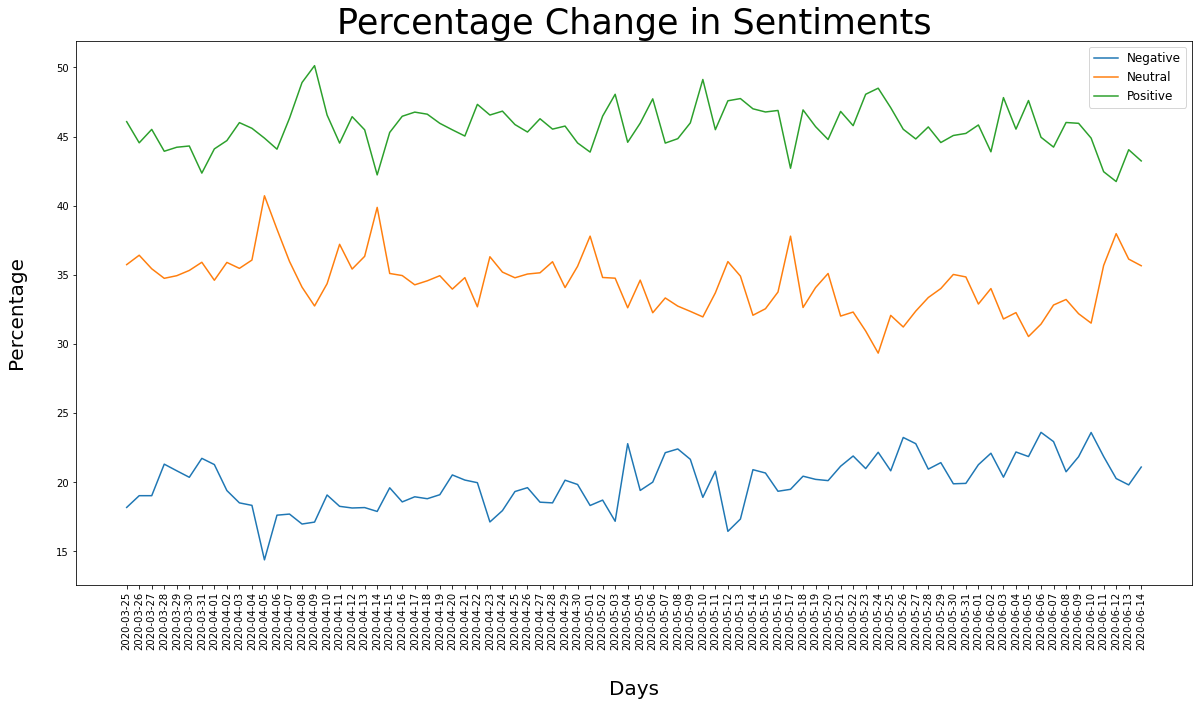

In [34]:
# Plot the data

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(result)
plt.title("Percentage Change in Sentiments",fontsize=35)
plt.xlabel("Days",fontsize=20,labelpad=30)
plt.ylabel("Percentage",fontsize=20,labelpad=30)
plt.legend(labels=result.columns,fontsize=12)

Here we can see that people has a positive outlook towards lockdown.

We can see that Positive tweets are averaged at 45%, Neutral tweets at 35% and Negative tweets are at 20%.
